In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the datasets
patient_details = pd.read_csv('patient_details.csv')
heart_disease_features = pd.read_csv('extracted_features.csv')

# Dictionary for replacing values in 'Reason for admission' column
replace_dict = {
    'Myocardial infarction': 1,  # 1 for heart disease
    'Healthy control': 0,        # 0 for no heart disease
}

# Filter the dataset for only 'Myocardial infarction' and 'Healthy control'
patient_details = patient_details[patient_details['Reason for admission'].isin(['Myocardial infarction', 'Healthy control'])]

# Replace values in 'Reason for admission' column
patient_details['Reason for admission'] = patient_details['Reason for admission'].replace(replace_dict)

# Check and handle missing values in both datasets
heart_disease_features = heart_disease_features.dropna()  # Drop rows with missing values in feature data
patient_details = patient_details.dropna(subset=['Reason for admission'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9156\324572654.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  patient_details['Reason for admission'] = patient_details['Reason for admission'].replace(replace_dict)


In [3]:
heart_disease_features

,mean_amplitude,std_amplitude,variance_amplitude,dominant_frequency,signal_entropy,mean_rr_interval,std_rr_interval,qrs_duration,num_peaks,rmssd,sdnn,r_wave_amplitude,s_wave_depth,pr_interval,qt_interval,st_segment,t_wave_symmetry
0,-0.016710,0.996732,0.993475,0.9,8.777992,178.500000,30.177451,178.500000,57,44.740057,30.177451,6.939966,-1.123009,0.224,10.398,10.198,0.016415
1,0.009007,1.006304,1.012647,1.3,8.466712,191.903846,34.966610,191.903846,53,56.222074,34.966610,5.086277,-0.404090,0.161,10.384,10.184,0.099574
2,0.009007,1.024633,1.049873,5.8,8.336429,180.818182,39.945459,180.818182,56,57.958159,39.945459,6.542680,-0.390201,0.215,10.350,10.150,7.223926
3,-0.000157,0.932812,0.870138,4.6,8.445823,219.155556,36.180999,219.155556,46,62.497636,36.180999,6.323793,0.195771,0.187,10.276,10.076,6.827707
4,0.013721,1.123704,1.262710,4.7,8.428628,210.659574,44.289798,210.659574,48,76.191692,44.289798,10.314774,-0.163101,0.212,10.385,10.185,6.184699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,-0.001111,0.843929,0.712216,1.1,8.804257,188.846154,45.760827,188.846154,53,78.710689,45.760827,6.177672,-0.470486,0.206,10.332,10.132,0.057227
545,-0.006080,1.007759,1.015578,1.0,8.826457,204.354167,55.187744,204.354167,49,99.913260,55.187744,6.834184,-0.548513,0.185,10.358,10.158,0.086469
546,0.005979,0.999273,0.998547,1.3,8.359388,189.634615,33.904293,189.634615,53,54.407684,33.904293,4.388339,0.039822,0.168,10.311,10.111,0.726277
547,0.007951,0.990621,0.981329,17.3,8.325804,173.578947,14.554130,173.578947,58,24.501458,14.554130,4.081869,0.023768,0.155,10.368,10.168,0.403530


In [4]:
patient_details

,age,sex,ECG date,Reason for admission,Acute infarction (localization),Former infarction (localization),Additional diagnoses,Smoker,Number of coronary vessels involved,Infarction date (acute),...,Echocardiography,Infarction date,Admission date,Medication pre admission,Start lysis therapy (hh.mm),Lytic agent,Dosage (lytic agent),Additional medication,In hospital medication,Medication after discharge
0,81.0,female,01/10/1990,1,infero-latera,no,Diabetes mellitus,no,1,29-Sep-90,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19:45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
1,81.0,female,17/10/1990,1,infero-latera,no,Diabetes mellitus,no,1,29-Sep-90,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19:45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
2,81.0,female,18/10/1990,1,infero-latera,no,Diabetes mellitus,no,1,29-Sep-90,...,NaN,29-Sep-90,29-Sep-90,Isosorbit-Dinitrate Digoxin Glibenclamide,19:45,Gamma-TPA,30 mg,Heparin Isosorbit-Mononitrate ASA Diazepam,ASA Isosorbit-Mononitrate Ca-antagonist Amilor...,ASA Isosorbit-Mononitrate Amiloride+Chlorothia...
3,58.0,female,17/10/1990,1,anterior,no,"Arterial hypertension, Adiposis hepatis, Gastr...",yes,1,08-Oct-90,...,NaN,08-Oct-90,08-Oct-90,Ca-antagonist Estriol,08:10,Streptokinase,1.5 Mio IE,Nitrate Heparin Ca-antagonist Atropin Ranitidin,ASA Isosorbit-Mononitrate Ca-antagonist Ca-ant...,ASA Bisoprolol Ofloxazin
4,63.0,male,18/10/1990,1,infero-postero-lateral,no,no,yes,1,02-Oct-90,...,NaN,02-Oct-90,02-Oct-90,-,NaN,Gamma-TPA,30 mg,Furosemide,ASA Isosorbit-Mononitrate,ASA Isosorbit-Mononitrate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,66.0,male,03/06/1997,1,antero-lateral,no,Arterial hypertension,unknown,unknown,14-May-97,...,NaN,14-May-97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,66.0,male,03/06/1997,1,antero-lateral,no,Arterial hypertension,unknown,unknown,14-May-97,...,NaN,14-May-97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,75.0,male,03/06/1997,1,antero-lateral,no,unknown,unknown,2,21-May-97,...,NaN,21-May-97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,75.0,male,03/06/1997,1,antero-lateral,no,unknown,unknown,2,21-May-97,...,NaN,21-May-97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

# Trim the features to match the length of the target variable 'y'
X = heart_disease_features.iloc[:len(patient_details)]
y = patient_details['Reason for admission']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classifiers = {}
y_preds = {}
accuracies = {}
classification_reports = {}
roc_data = {}

# Train and evaluate for each kernel
for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, probability=True)  # Set probability=True for ROC curve
    svm_classifier.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svm_classifier.predict(X_test_scaled)
    y_preds[kernel] = y_pred
    
    # Store accuracy and classification report
    accuracies[kernel] = accuracy_score(y_test, y_pred)
    classification_reports[kernel] = classification_report(y_test, y_pred, zero_division=1)
    
    # Calculate ROC curve and AUC
    y_proba = svm_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability for positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[kernel] = (fpr, tpr, roc_auc)

# Print results for each kernel
for kernel in kernels:
    print(f'Accuracy using {kernel} kernel: {accuracies[kernel]:.2f}')
    print(f'Classification Report using {kernel} kernel:')
    print(classification_reports[kernel])
    print('-' * 60)

Accuracy using linear kernel: 0.83
Classification Report using linear kernel:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        15
           1       0.83      1.00      0.91        75

    accuracy                           0.83        90
   macro avg       0.92      0.50      0.45        90
weighted avg       0.86      0.83      0.76        90

------------------------------------------------------------
Accuracy using poly kernel: 0.81
Classification Report using poly kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.83      0.97      0.90        75

    accuracy                           0.81        90
   macro avg       0.41      0.49      0.45        90
weighted avg       0.69      0.81      0.75        90

------------------------------------------------------------
Accuracy using rbf kernel: 0.83
Classification Report using rbf kernel:


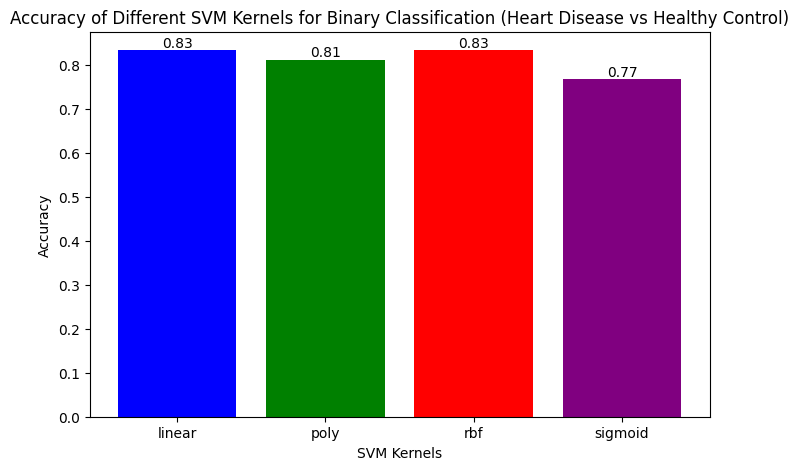

In [6]:

# Plotting SVM performance for binary classification with all kernels
plt.figure(figsize=(8, 5))
bars = plt.bar(kernels, [accuracies[k] for k in kernels], color=['blue', 'green', 'red', 'purple'])

# Add labels and title
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels for Binary Classification (Heart Disease vs Healthy Control)')

# Display accuracy values on top of each bar
for bar, acc in zip(bars, [accuracies[k] for k in kernels]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}', 
             ha='center', va='bottom')

# Display the plot
plt.show()

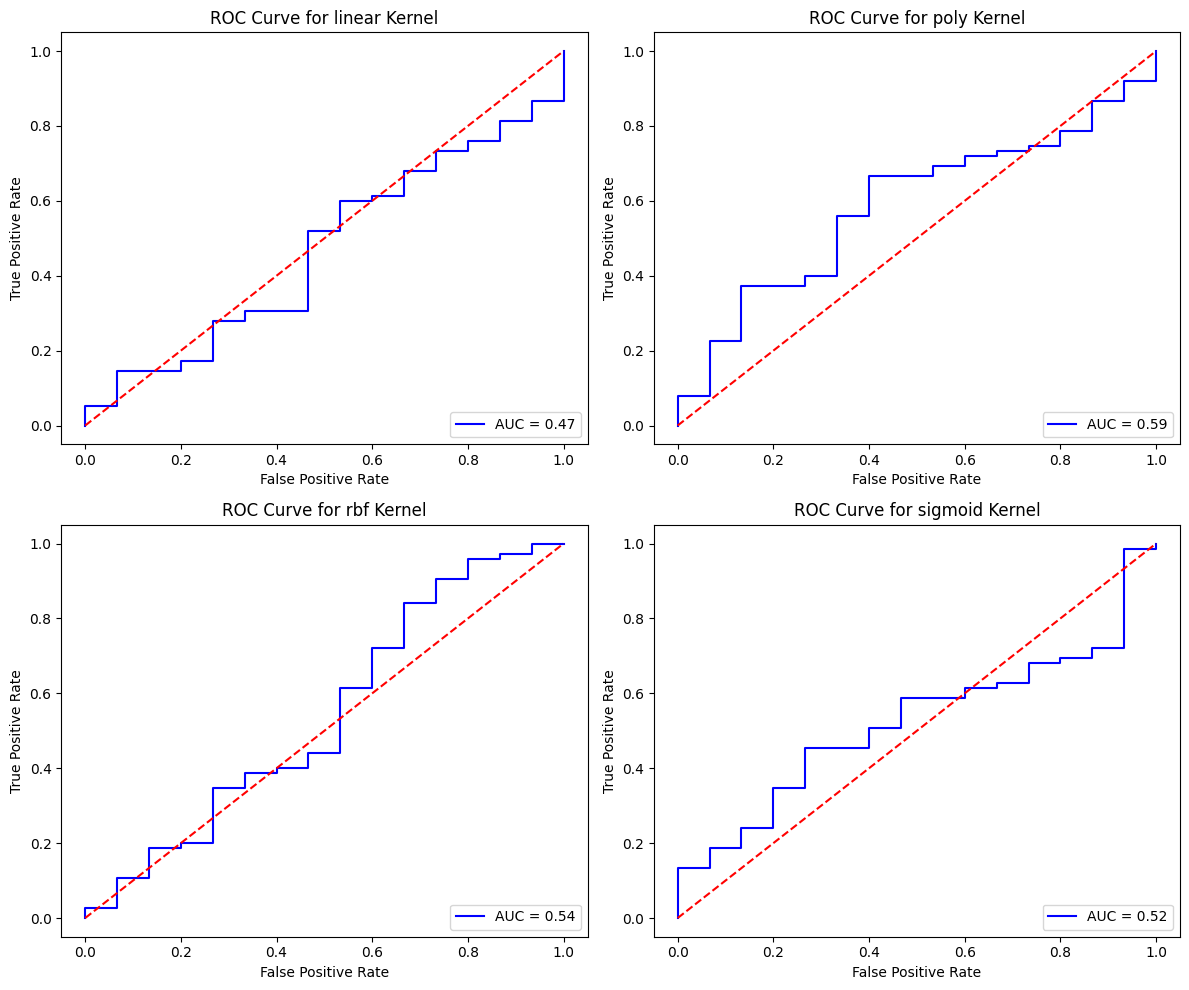

In [7]:

# Plot ROC Curves
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 subplot layout
axs = axs.flatten()  # Flatten the axis array for easier iteration

for i, kernel in enumerate(kernels):
    fpr, tpr, roc_auc = roc_data[kernel]
    axs[i].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
    axs[i].plot([0, 1], [0, 1], 'r--')  # Diagonal line for random classifier
    axs[i].set_title(f'ROC Curve for {kernel} Kernel')
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].legend(loc='lower right')

plt.tight_layout()
plt.show()
